<a href="https://colab.research.google.com/github/KadamShivanjalii/OIBSIP_DataScience_Task4/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv("spam.csv", sep="\t", names=["label","message"])
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df["label"] = df["label"].map({"ham":0, "spam":1})


In [5]:
X = df["message"]
y = df["label"]

cv = CountVectorizer()
X = cv.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [8]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9856502242152466


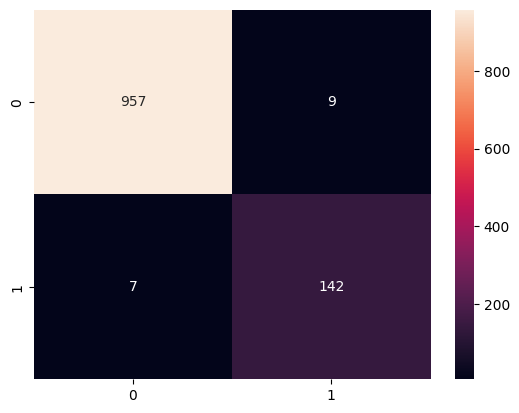

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()
